In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

In [4]:
from sklearn import preprocessing, metrics, model_selection
import utils
import scipy.io
import numpy as np
from linear_classifier import LinearSVM_twoclass
import matplotlib.pyplot as plt
from sklearn.cross_validation import *

# load the SPAM email training dataset

X,y = utils.load_mat('data/spamTrain.mat')
yy = np.ones(y.shape)
yy[y==0] = -1

# load the SPAM email test dataset

test_data = scipy.io.loadmat('data/spamTest.mat')
X_test = test_data['Xtest']
y_test = test_data['ytest'].flatten()
yy_test = np.ones(y_test.shape)
yy_test[y_test==0] = -1

##################################################################################
#  YOUR CODE HERE for training the best performing SVM for the data above.       #
#  what should C be? What should num_iters be? Should X be scaled?               #
#  should X be kernelized? What should the learning rate be? What should the     #
#  number of iterations be?                                                      #
##################################################################################

svm = LinearSVM_twoclass()
svm.theta = np.zeros((X.shape[1],))
best_C = 0
best_sigma = 0
best_learning_rate = 0
best_test_acc = 0
best_svm = LinearSVM_twoclass()

Cs = [0.1, 0.3, 0,5, 1,2,3,4,5,10,20,50]
sigmas = [0.001, 0.01, 0.1, 1]
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2]
num_iters = [200, 500, 600, 700, 1000, 2000,5000, 10000]

length = len(Cs)*len(sigmas)*len(learning_rates)
score_train = np.zeros(length)
score_test = np.zeros(length)
C_matrix = np.zeros(length)
sig_matrix = np.zeros(length)
learning_rate_matrix = np.zeros(length)
count = 0

#set train and val data set
X_train,X_val,y_train,y_val = model_selection.train_test_split(X,y,test_size=0.2)
yy_val = np.ones(y_val.shape)
yy_val[y_val==0] = -1

for sig in sigmas:
    K = metrics.pairwise.rbf_kernel(X_train,X_train,1/sig**2)
    K_test = metrics.pairwise.rbf_kernel(X_val,X_train,1/sig**2)

    # # scale the kernelized data matrix

    scaler = preprocessing.StandardScaler().fit(K)
    scaleK = scaler.transform(K)

    scaler = preprocessing.StandardScaler().fit(K_test)
    scaleK_test = scaler.transform(K_test)

    # add the intercept term

    KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
    KK_test = np.vstack([np.ones((scaleK_test.shape[0],)),scaleK_test.T]).T

    # transform y from [0,1] to [-1,1]

    yy = np.ones(y_train.shape)
    yy[y_train == 0] = -1

    # set up the SVM and learn the parameters

    svm.theta = np.zeros((KK.shape[1],))
    
    for C in Cs:
        for l in learning_rates:
            svm.train(KK,yy,learning_rate=l,reg=C,num_iters=2000,verbose=False)
            ac_train = metrics.accuracy_score(yy, svm.predict(KK))
            ac = metrics.accuracy_score(yy_val, svm.predict(KK_test))
            if(best_test_acc<ac):
                best_test_acc = ac
                best_svm = svm
                best_C = C
                best_sigma = sig
                best_learning_rate = l
            print ac_train, ac
            
            score_train[count] = ac_train
            score_test[count] = ac
            C_matrix[count] = C
            sig_matrix[count] = sig
            learning_rate_matrix[count] = l
            count += 1
    
##################################################################################
# YOUR CODE HERE for testing your best model's performance                       #
# what is the accuracy of your best model on the test set? On the training set?  #
##################################################################################

# convert X to kernel form with the kernel function

sigma = best_sigma

# compute the kernel (slow!)

K = metrics.pairwise.rbf_kernel(X,X,1/sigma**2)
K_test = metrics.pairwise.rbf_kernel(X_test,X,1/sigma**2)

# # scale the kernelized data matrix

scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

scaler = preprocessing.StandardScaler().fit(K_test)
scaleK_test = scaler.transform(K_test)

# add the intercept term

KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
KK_test = np.vstack([np.ones((scaleK_test.shape[0],)),scaleK_test.T]).T

# transform y from [0,1] to [-1,1]

yy = np.ones(y.shape)
yy[y == 0] = -1

# set up the SVM and learn the parameters

svm.theta = np.zeros((KK.shape[1],))

C = best_C


svm.train(KK,yy,learning_rate=best_learning_rate,reg=C,num_iters=10000,verbose=True)

# ac = np.mean(y_test == svm.predict(X_test))
ac_train = metrics.accuracy_score(yy, svm.predict(KK))
ac = metrics.accuracy_score(yy_test, svm.predict(KK_test))
print "train",ac_train, "test:", ac





##################################################################################
#                    END OF YOUR CODE                                            #
##################################################################################

1.0 0.77875
1.0 0.77875
1.0 0.78625
1.0 0.78625
1.0 0.78625
1.0 0.78125
1.0 0.7825
1.0 0.7825
1.0 0.78375
1.0 0.78375
1.0 0.78625
1.0 0.78
1.0 0.775
1.0 0.7525
1.0 0.7525
1.0 0.7525
1.0 0.7525
1.0 0.7525
1.0 0.7525
1.0 0.7525
1.0 0.7525
1.0 0.78625
1.0 0.78625
1.0 0.78625
1.0 0.77625
1.0 0.765
1.0 0.74375
0.9996875 0.74625
1.0 0.74625
1.0 0.74625
1.0 0.74625
1.0 0.74625
1.0 0.7525
1.0 0.75125
1.0 0.74875
1.0 0.74875
1.0 0.74875
1.0 0.74875
1.0 0.7675
1.0 0.745
1.0 0.755
1.0 0.76
1.0 0.76
1.0 0.76
1.0 0.76
1.0 0.75875
1.0 0.765
1.0 0.7625
1.0 0.76125
1.0 0.76125
1.0 0.76125
1.0 0.76125
1.0 0.76125
1.0 0.765
0.9975 0.7525
0.998125 0.7525
0.998125 0.7525
1.0 0.7525
1.0 0.7525
1.0 0.755
1.0 0.755
1.0 0.7575
0.999375 0.7475
1.0 0.7475
1.0 0.7475
1.0 0.7475
1.0 0.7575
1.0 0.75375
1.0 0.74375
1.0 0.7625
1.0 0.7625
1.0 0.7625
1.0 0.76125
1.0 0.7575
1.0 0.75125
1.0 0.7675
1.0 0.74625
1.0 0.74625
1.0 0.74625
1.0 0.74625
1.0 0.75
1.0 0.745
1.0 0.7525
0.9996875 0.75125
1.0 0.78125
1.0 0.78125
1.0 

In [5]:
import pandas as pd
pd.options.display.max_rows = 999
matrix = np.matrix(np.c_[score_train, score_test, C_matrix, sig_matrix, learning_rate_matrix])
models = pd.DataFrame(data = matrix, columns = 
             ['Train Accuracy', 'Test Accuracy', 'C', 'sigma', 'learning_rate'])
models


,Train Accuracy,Test Accuracy,C,sigma,learning_rate
0,1.000000,0.77875,0.1,0.001,0.0001
1,1.000000,0.77875,0.1,0.001,0.0010
2,1.000000,0.78625,0.1,0.001,0.0100
3,1.000000,0.78625,0.1,0.001,0.1000
4,1.000000,0.78625,0.1,0.001,1.0000
5,1.000000,0.78125,0.1,0.001,1.5000
6,1.000000,0.78250,0.1,0.001,2.0000
7,1.000000,0.78250,0.3,0.001,0.0001
8,1.000000,0.78375,0.3,0.001,0.0010
9,1.000000,0.78375,0.3,0.001,0.0100


iteration 0 / 5000: loss 0.100000
iteration 100 / 5000: loss 0.030953
iteration 200 / 5000: loss 0.020018
iteration 300 / 5000: loss 0.014775
iteration 400 / 5000: loss 0.015672
iteration 500 / 5000: loss 0.020257
iteration 600 / 5000: loss 0.017013
iteration 700 / 5000: loss 0.014223
iteration 800 / 5000: loss 0.013626
iteration 900 / 5000: loss 0.015069
iteration 1000 / 5000: loss 0.016837
iteration 1100 / 5000: loss 0.015804
iteration 1200 / 5000: loss 0.014178
iteration 1300 / 5000: loss 0.015059
iteration 1400 / 5000: loss 0.012263
iteration 1500 / 5000: loss 0.011142
iteration 1600 / 5000: loss 0.013795
iteration 1700 / 5000: loss 0.016151
iteration 1800 / 5000: loss 0.017561
iteration 1900 / 5000: loss 0.012723
iteration 2000 / 5000: loss 0.012832
iteration 2100 / 5000: loss 0.013894
iteration 2200 / 5000: loss 0.014751
iteration 2300 / 5000: loss 0.013944
iteration 2400 / 5000: loss 0.013410
iteration 2500 / 5000: loss 0.016687
iteration 2600 / 5000: loss 0.016591
iteration 270

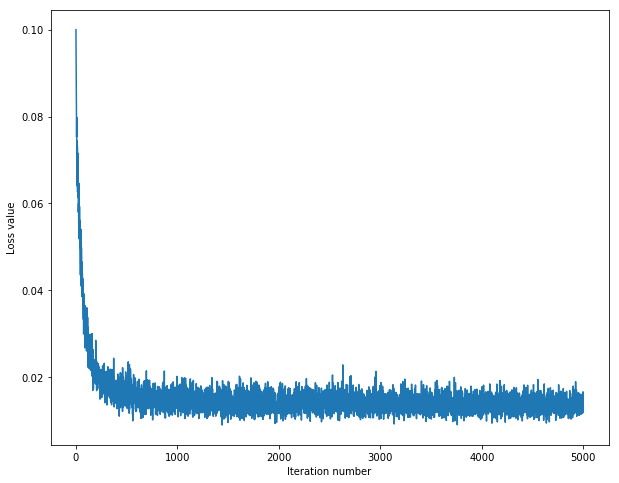

In [12]:
#do not kernelise and retrain the model, the test data accuracy increase 20%

svm.theta = np.zeros((X.shape[1],))

loss_hist = svm.train(X,yy,learning_rate=best_learning_rate,reg=C,num_iters=10000,verbose=True)

#if the learning_rate decrease, the num_iters must increase. We get better performance after we do so. (98.9%->99.3%)
#However, the training test accuracy decrease to 99.325%, which may avoid overfitting.

#after I use new validation set the accuracy decrease to 0.978, which is very close to the accuracy on training set
#As a result, our model might be not bad.


# ac = np.mean(y_test == svm.predict(X_test))
ac_train = metrics.accuracy_score(yy, svm.predict(X))
ac = metrics.accuracy_score(yy_test,svm.predict(X_test))
print ac_train, ac
print best_sigma, best_C, best_learning_rate

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [7]:
##################################################################################
# ANALYSIS OF MODEL: Print the top 15 words that are predictive of spam and for  #
# ham. Hint: use the coefficient values of the learned model                     #
##################################################################################
words, inv_words = utils.get_vocab_dict()
print svm.theta.shape
index = np.argsort(svm.theta)[-15:]
print index
print "Top 15 predictors of spam are: "
for i in range(-1,-16,-1):
    print words[index[i]+1]

(1899,)
[1721 1163  680  529 1101 1851  738 1892 1894  774 1263  155 1190 1397  297]
Top 15 predictors of spam are: 
click
remov
our
basenumb
pleas
here
your
you
guarante
will
nextpart
email
free
offer
transfer
